<a href="https://colab.research.google.com/github/ArsalanAliMujtaba/Radioactive-Engineer/blob/master/kaggle_cat_vs_dog_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:10<00:00, 128MB/s]
100% 812M/812M [00:10<00:00, 82.0MB/s]


In [7]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [8]:
! unzip test1.zip
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
!pip install Pillow


In [21]:
def resize_and_load_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)

    # You can add more preprocessing steps here if needed

    return np.array(image)

def load_resized_image_dataset(train_folder, test_folder, target_size):
    train_set_x = []
    train_set_y = []
    test_set_x = []
    test_set_y = []

    classes = ['cat', 'dog']  # Assuming 'cat' comes before 'dog' in the file names

    for folder in [train_folder, test_folder]:
        for file_name in os.listdir(folder):
            if file_name.startswith('dog'):
                label = 1  # Dog class label
            elif file_name.startswith('cat'):
                label = 0  # Cat class label
            else:
                continue  # Skip files not starting with 'dog' or 'cat'

            file_path = os.path.join(folder, file_name)
            image = resize_and_load_image(file_path, target_size)  # Resize and load the image

            if np.random.rand() < 0.8:  # 80% for training, 20% for testing
                train_set_x.append(image)
                train_set_y.append(label)
            else:
                test_set_x.append(image)
                test_set_y.append(label)

    train_set_x = np.array(train_set_x)
    train_set_y = np.array(train_set_y).reshape(1, -1)  # Reshape train_set_y to (1, m_train)
    test_set_x = np.array(test_set_x)
    test_set_y = np.array(test_set_y).reshape(1, -1)  # Reshape test_set_y to (1, m_test)

    return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [55]:


train_folder = '/content/train'  # Path to your train folder
test_folder = '/content/test1'   # Path to your test1 folder
target_size = (100, 100)  # Desired size of the images

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_resized_image_dataset(train_folder, test_folder, target_size)



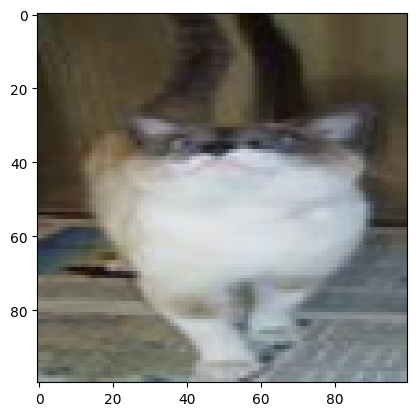

IndexError: ignored

In [56]:
import matplotlib.pyplot as plt
# Handle the difference in shape for test_set_y
if len(test_set_y.shape) == 2 and test_set_y.shape[0] == 1:
    label = test_set_y[0, index]
else:
    label = test_set_y[index]
# Example of a picture
index = 20
plt.imshow(train_set_x_orig[index])
plt.show()  # Display the image
print("y = " + str(train_set_y[index]) + ", it's a '" + classes[train_set_y[index]] + "' picture.")


In [57]:
# import numpy as np
# import copy
# import matplotlib.pyplot as plt
# import h5py
# import scipy
# from PIL import Image
# from scipy import ndimage

# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# train_folder = '/content/train'  # Path to your train folder
# test_folder = '/content/test1'   # Path to your test1 folder

# train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_image_dataset(train_folder, test_folder)

#(≈ 3 lines of code)
# m_train =
# m_test =
# num_px =
# YOUR CODE STARTS HERE
# Extracted values for printing
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = target_size[0]  # Use the target_size for num_px

print("Number of training examples: m_train =", m_train)
print("Number of testing examples: m_test =", m_test)
print("Height/Width of each image: num_px =", num_px)
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape:", train_set_x_orig.shape)
print("train_set_y shape:", train_set_y.shape)
print("test_set_x shape:", test_set_x_orig.shape)
print("test_set_y shape:", test_set_y.shape)

Number of training examples: m_train = 19977
Number of testing examples: m_test = 5023
Height/Width of each image: num_px = 100
Each image is of size: (100, 100, 3)
train_set_x shape: (19977, 100, 100, 3)
train_set_y shape: (1, 19977)
test_set_x shape: (5023, 100, 100, 3)
test_set_y shape: (1, 5023)


In [58]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
assert np.alltrue(train_set_x_flatten.shape[0], -1).T
assert np.alltrue(test_set_x_flatten.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

train_set_x_flatten shape: (30000, 19977)
train_set_y shape: (1, 19977)
test_set_x_flatten shape: (30000, 5023)
test_set_y shape: (1, 5023)


In [59]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z
​
    Arguments:
    z -- A scalar or numpy array of any size.
​
    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = (1/(1+np.exp(-z)))

    # YOUR CODE ENDS HERE

    return s
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

# sigmoid_test(sigmoid)
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)


sigmoid([0, 2]) = [0.5        0.88079708]
[0.62245933 0.5        0.88079708]


In [60]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b = 0.0
    # YOUR CODE ENDS HERE

    return w, b

In [61]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))


w = [[0.]
 [0.]]
b = 0.0


In [62]:

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
​
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
​
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication.
    # And don't use loops for the sum.
    # cost = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X) + b)                                     # compute activation
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))                                  # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1 / m *(np.dot(X,(A - Y).T))
    db = 1 / m *(np.sum(A - Y))

    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [63]:

w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


In [64]:


def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation
        # grads, cost = ...
        # YOUR CODE STARTS HERE

        grads, cost = propagate(w,b,X,Y)

        # YOUR CODE ENDS HERE

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE

        w = w - learning_rate*dw
        b = b - learning_rate*db

        # YOUR CODE ENDS HERE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [65]:

params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))


w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


In [66]:

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE


    A = sigmoid(np.dot(w.T,X) + b)
    # YOUR CODE ENDS HERE

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] =
        # else:
        #     Y_prediction[0,i] =
        # YOUR CODE STARTS HERE

        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1

        # YOUR CODE ENDS HERE

    return Y_prediction

In [67]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [68]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # w, b = ...

    #(≈ 1 line of code)
    # Gradient descent
    # params, grads, costs = ...

    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...

    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # YOUR CODE STARTS HERE

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs =  optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [69]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.001, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.674909


KeyboardInterrupt: ignored

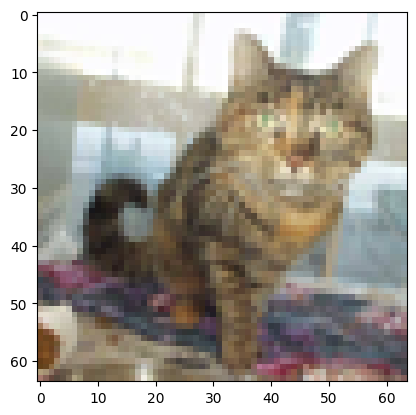

y = 0 , you predicted that it is a "dog" picture.


In [54]:
# Example of a picture that was wrongly classified.
index = 7
plt.imshow(test_set_x_orig[index])
plt.show()  # Display the image

true_label = test_set_y[0, index]
predicted_label = int(logistic_regression_model['Y_prediction_test'][0, index])

print("y =", true_label, ", you predicted that it is a \"" + classes[predicted_label] + "\" picture.")


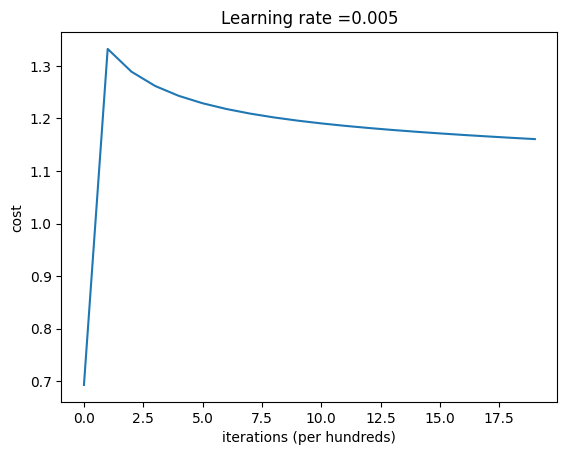

In [48]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



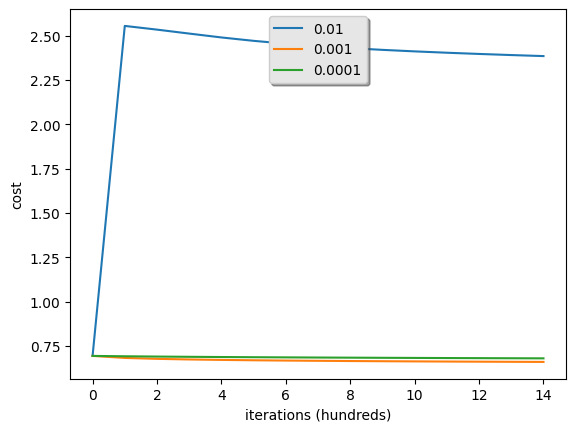

In [49]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
# change this to the name of your image file
my_image = "my_image.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")